In [ ]:
№1

h(x)= +1, if x>=a
точка поломки 3
размерность В-Ч = 2
m_H(N)=N+1 (число сочетаний из N+1 по 1)

h(x)= +1, if a>=x>=b
точка поломки 3 (например, +1 -1 +1 на прямой)
размерность В-Ч = 2
m_H(N)=(N+1)*N/2+1 (число комбинаций из 2 перегородок между N шарами без повторов + 1 случай без перегородок)

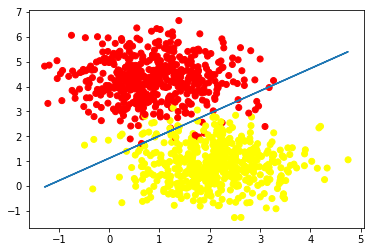

acc = 0.969


In [77]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/HW5/blobs2.csv')
df.columns = ['x','y','label']
df = pd.concat([df,pd.Series([1]*df.shape[0]).rename('w0')], axis=1)

kf = StratifiedKFold(n_splits=5, shuffle=True)
kf_n = 0
predictions = []

def step(w, X, y):
    s = (1-1*(np.sign(X.dot(w))==y))
    w = w + X.T.dot(s*y)
    return w

def acc(w, X, y):
    n_row = X.shape[0]
    s = (1*(np.sign(X.dot(w))==y))
    return (sum(s))

res = []
for train_index, test_index in kf.split(df, df[['label']]):
    train_df = df.iloc[train_index]
    validate_df = df.iloc[test_index]
    
    w = 2*np.random.random((3,1)) - 1
    X = np.array(train_df[['x','y','w0']])
    y = np.reshape(np.array(train_df.label)*2-1, (X.shape[0],1))
    
    X_val = np.array(validate_df[['x','y','w0']])
    y_val = np.reshape(np.array(validate_df.label)*2-1, (X_val.shape[0],1))
    
    acc_list = []
    for n in range(0,50):
        w = step(w, X, y)
        a = acc(w, X_val, y_val)
        acc_list.append([w.flatten(), a])
    u = (list(zip(*acc_list)))

    res.append(u[0][np.argmax(u[1])])

m = res[0]
for r in res[1:]:
    m=m+r
    
w2 = m/5

X = np.array(df[['x','y','w0']])
y = np.reshape(np.array(df.label)*2-1, (X.shape[0],1))

v = np.array(w2).flatten()
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap=plt.cm.autumn)
if v[1]!=0:
    plt.plot(X[:,0], (-v[2]-v[0]*X[:,0])/v[1])
elif v[0]!=0:
    plt.plot([-v[2]/v[0],-v[2]/v[0]], [min(X[:,1]),max(X[:,1])])
max(y.flatten())
plt.show()

s = (1*(np.sign(X.dot(w))==y))    
print('acc =', sum(s)[0]/X.shape[0])

In [82]:
df['x2'] = df['x']**2
df['y2'] = df['y']**2
df['xy'] = df['x']*df['y']

df

,x,y,label,w0,x2,y2,xy
0,0.543066,3.931424,0,1,0.294920,15.456096,2.135022
1,2.563694,3.473101,0,1,6.572529,12.062431,8.903970
2,0.665973,2.781159,0,1,0.443520,7.734845,1.852177
3,3.552344,1.538645,1,1,12.619146,2.367428,5.465796
4,1.397117,0.668682,1,1,1.951935,0.447136,0.934227
5,0.986667,5.637658,0,1,0.973512,31.783188,5.562493
6,1.201593,0.049201,1,1,1.443826,0.002421,0.059119
7,0.923888,4.212578,0,1,0.853568,17.745812,3.891949
8,0.892585,3.739831,0,1,0.796709,13.986334,3.338118
9,1.084651,-0.216661,1,1,1.176468,0.046942,-0.235002
